In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Convolution2D
from keras.optimizers import SGD,Adam

Using TensorFlow backend.


In [2]:
(trainX, trainy), (testX, testy) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
type(trainX), type(trainy)

(numpy.ndarray, numpy.ndarray)

In [4]:
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


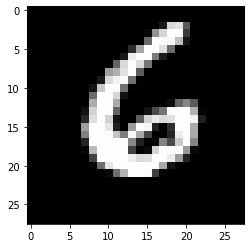

In [5]:
plt.imshow(trainX[90], cmap='gray')

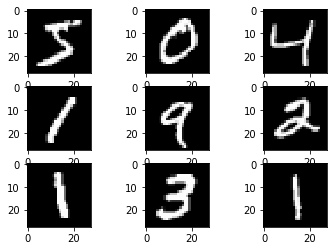

In [6]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(trainX[i], cmap='gray')
plt.show()

In [0]:
## Add color channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [0]:
trainy = to_categorical(trainy)
testy = to_categorical(testy)

In [9]:
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28, 1), y=(60000, 10)
Test: X=(10000, 28, 28, 1), y=(10000, 10)


In [0]:
# convert from integers to floats
train_normX = trainX.astype('float32')
test_normX = testX.astype('float32')
# normalize to range 0-1
train_normX = train_normX / 255.0
test_normX = test_normX / 255.0

In [11]:
##Defining Model

model = Sequential()

model.add(Convolution2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))

In [0]:
opt = Adam(lr=0.01)

In [13]:
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [15]:
## Model evaluation with K-fold cross validation

accuracy,hists = [],[]

kfold = KFold(5,shuffle=True)

for t_ix,v_ix in kfold.split(train_normX):
  
  tr_x, tr_y, vl_x, vl_y = train_normX[t_ix],trainy[t_ix], train_normX[v_ix],trainy[v_ix]
  
  hist = model.fit(tr_x, tr_y, epochs = 10, batch_size=32, 
                   validation_data=(vl_x, vl_y))
  _, acc = model.evaluate(vl_x,vl_y)
  print("  validation accuracy: %.3f" % (acc*100.0) )

  accuracy.append(acc)
  hists.append(hist)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/10





48000/48000 [==============================] - 19s 395us/step - loss: 0.2094 - acc: 0.9529 - val_loss: 0.0758 - val_acc: 0.9751
Epoch 2/10
48000/48000 [==============================] - 11s 226us/step - loss: 0.0687 - acc: 0.9789 - val_loss: 0.0931 - val_acc: 0.9757
Epoch 3/10
48000/48000 [==============================] - 11s 229us/step - loss: 0.0606 - acc: 0.9825 - val_loss: 0.0846 - val_acc: 0.9788
Epoch 4/10
48000/48000 [==============================] - 11s 234us/step - loss: 0.0480 - acc: 0.9869 - val_loss: 0.1136 - val_acc: 0.9755
Epoch 5/10
48000/48000 [==============================] - 11s 227us/step - loss: 0.0450 - acc: 0.9888 - val_loss: 0.1758 - val_acc: 0.9729
Epoch 6/10
48000/48000 [==============================] - 11s 228us/step - loss: 0.0451 - acc: 0.9890 - val_loss: 0.1528 - val_acc: 0.9727
Epoch 7/10
480

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


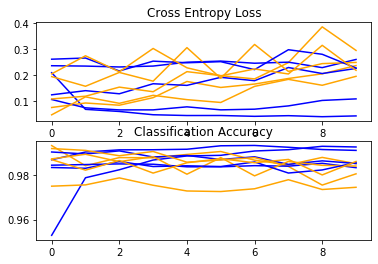

In [16]:
for i in range(len(hists)):
  # plot loss
  plt.subplot(211)
  plt.title('Cross Entropy Loss')
  plt.plot(hists[i].history['loss'], color='blue', label='train')
  plt.plot(hists[i].history['val_loss'], color='orange', label='test')
  # plot accuracy
  plt.subplot(212)
  plt.title('Classification Accuracy')
  plt.plot(hists[i].history['acc'], color='blue', label='train')
  plt.plot(hists[i].history['val_acc'], color='orange', label='test')
plt.show()

Accuracy: mean=98.218 std=0.424, n=5


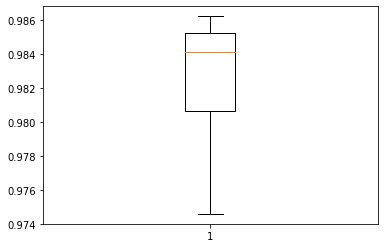

In [17]:
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(accuracy)*100, np.std(accuracy)*100, len(accuracy)))

plt.boxplot(accuracy)
plt.show()

In [18]:
_, acc = model.evaluate(test_normX, testy)
print('%.3f' % (acc * 100.0))

10000/10000 [==============================] - 1s 71us/step
97.820


In [0]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

def load_image(img):
	img = img_to_array(img)
	img = img.reshape(1, 28, 28, 1)
	img = img.astype('float32')
	img = img / 255.0
	return img

def run_example(image_name):
	img = load_image(image_name)
	digit = model.predict_classes(img)
	print(digit[0])

In [0]:
url = 'http://clipart-library.com/img1/188866.png'
from matplotlib.image import imread
img = imread(url)

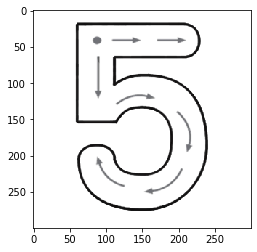

In [21]:
plt.imshow(img)

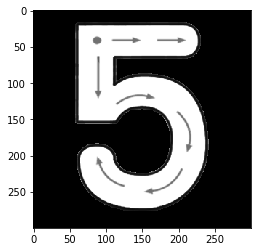

In [22]:
import cv2
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img,cmap='gray')

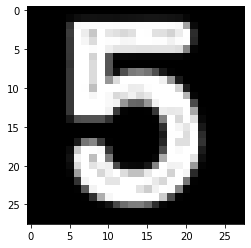

In [23]:
img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA)
plt.imshow(img,cmap='gray')

In [24]:
img.shape

(28, 28)

In [25]:
run_example(img)

7
